In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
scen1_file_lists = ['dqn_uniform_traffic_test_data.csv', 'sarsa_uniform_traffic_test_data.csv', 'a2c_uniform_traffic_test_data.csv', 'ft_uniform_traffic_test_data.csv']

In [3]:
method_names = ['DQN', 'SARSA', 'A2C', 'Fixed Time']  # Names to use for renaming columns

# Load and rename the 'Avg Waiting Time' column uniquely
scen1_dfs = [pd.read_csv(file).rename(columns={'Average Queue length': f'Avg Queue Length ({method})', 'Total Queue Length': f'Total Queue Length ({method})', 
                                               'Avg Waiting Time': f'Avg Waiting Time ({method})', 'Reward': f'Reward ({method})'}) 
       for file, method in zip(scen1_file_lists, method_names)]

In [4]:
scen1_df = scen1_dfs[0]
for df in scen1_dfs[1:]:
    scen1_df = scen1_df.merge(df, on="Step", how="outer")

In [5]:
scen1_df

,Avg Queue Length (DQN),Reward (DQN),Step,Total Queue Length (DQN),Avg Waiting Time (DQN),Avg Queue Length (SARSA),Reward (SARSA),Total Queue Length (SARSA),Avg Waiting Time (SARSA),Avg Queue Length (A2C),Reward (A2C),Total Queue Length (A2C),Avg Waiting Time (A2C),Avg Queue Length (Fixed Time),Reward (Fixed Time),Total Queue Length (Fixed Time),Avg Waiting Time (Fixed Time)
0,0.000,0.0000,1,0,0.000,0.000000,0.000000,0,0.000,0.000,0.0000,0,0.000,0.000000,0.000000,0,0.000
1,0.100,-0.0700,2,4,0.000,0.100000,-0.070000,4,0.000,0.100,-0.0700,4,0.000,0.100000,-0.070000,4,0.000
2,0.000,0.0000,3,0,0.000,0.000000,0.000000,0,0.000,0.000,0.0000,0,0.000,0.000000,0.000000,0,0.000
3,0.025,-0.0175,4,1,0.000,0.025000,-0.017500,1,0.000,0.025,-0.0175,1,0.000,0.025000,-0.017500,1,0.000
4,0.025,-0.0175,5,1,0.000,0.025000,-0.017500,1,0.000,0.025,-0.0175,1,0.000,0.025000,-0.017500,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.250,-0.8000,2996,10,3.125,0.187500,-2.556250,12,12.875,0.325,-1.6525,13,7.875,0.267857,-2.662500,15,12.375
2996,0.300,-0.8600,2997,12,3.250,0.203125,-2.967188,13,14.125,0.250,-1.6000,10,7.125,0.303571,-3.062500,17,14.250
2997,0.300,-0.5100,2998,12,3.000,0.187500,-3.081250,12,14.750,0.250,-1.5000,10,7.375,0.267857,-3.362500,15,15.875
2998,0.250,-0.7750,2999,10,3.000,0.234375,-3.464063,15,16.500,0.200,-1.6150,8,7.375,0.234375,-3.714062,15,17.750


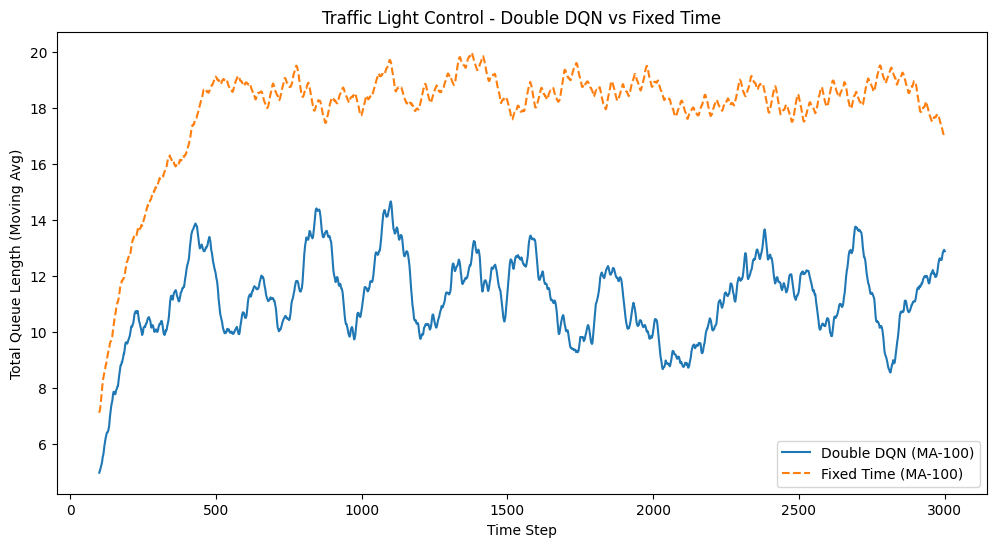

In [57]:
plt.figure(figsize=(12, 6))
methods = ['DQN', 'Fixed Time']
window_size = 100  # You can tweak this for smoother/rougher plots

for i, method in enumerate(methods):
    smoothed = scen1_df[f"Total Queue Length ({method})"].rolling(window=window_size).mean()
    if method == 'DQN':
        plt.plot(scen1_df["Step"], smoothed, label=f"Double {method} (MA-{window_size})")
    else:
        # For Fixed Time, use a different linestyle, e.g., dashed line
        plt.plot(scen1_df["Step"], smoothed, label=f"{method} (MA-{window_size})", linestyle='--')

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length (Moving Avg)")
plt.title("Traffic Light Control - Double DQN vs Fixed Time")
plt.legend()
# Save the figure before showing it
plt.savefig("plots/double_dqn_vs_ft.png", dpi=300, bbox_inches="tight")
plt.show()

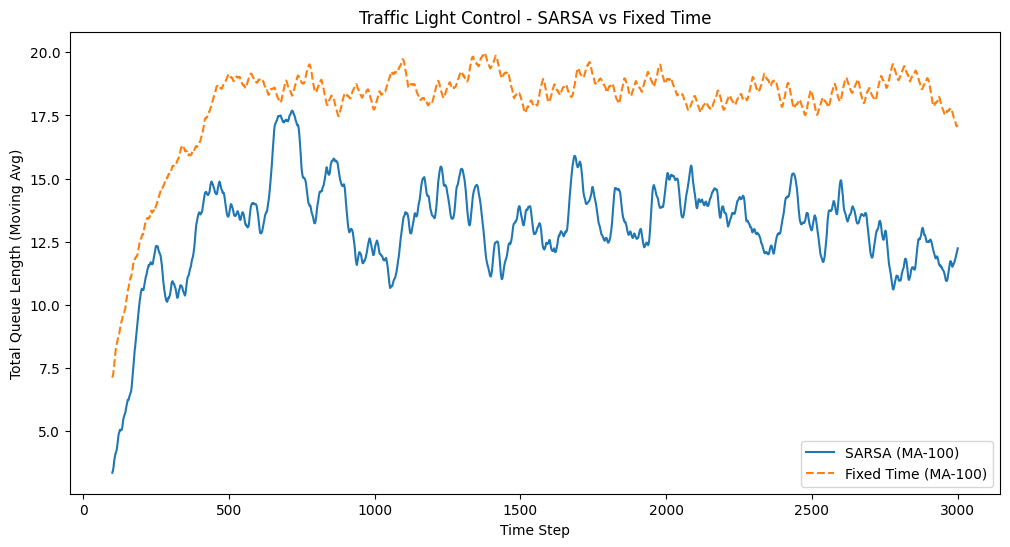

In [58]:
plt.figure(figsize=(12, 6))
methods = ['SARSA', 'Fixed Time']
window_size = 100  # You can tweak this for smoother/rougher plots

for i, method in enumerate(methods):
    smoothed = scen1_df[f"Total Queue Length ({method})"].rolling(window=window_size).mean()
    if method == 'SARSA':
        plt.plot(scen1_df["Step"], smoothed, label=f"{method} (MA-{window_size})")
    else:
        # For Fixed Time, use a different linestyle, e.g., dashed line
        plt.plot(scen1_df["Step"], smoothed, label=f"{method} (MA-{window_size})", linestyle='--')

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length (Moving Avg)")
plt.title("Traffic Light Control - SARSA vs Fixed Time")
plt.legend()
# Save the figure before showing it
plt.savefig("plots/sarsa_vs_ft.png", dpi=300, bbox_inches="tight")
plt.show()

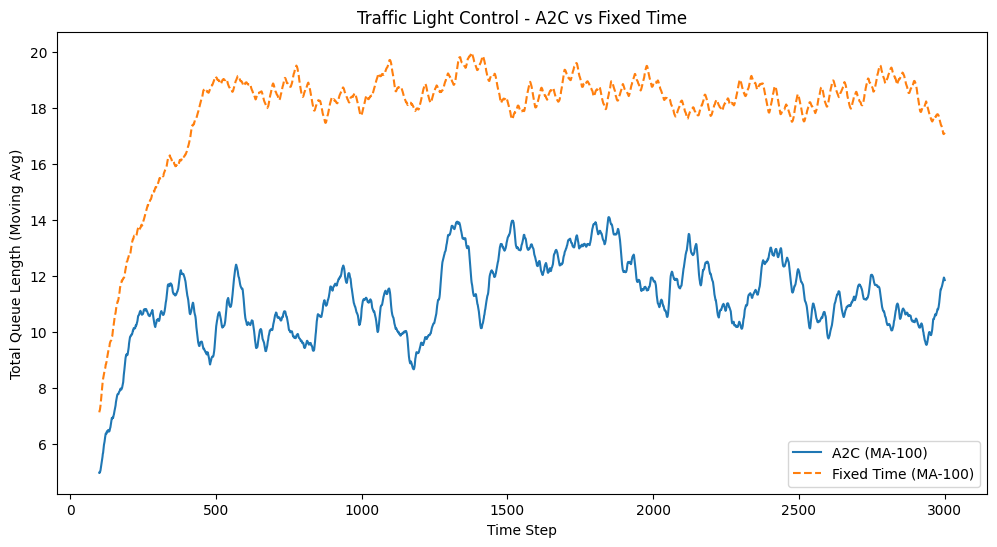

In [59]:
plt.figure(figsize=(12, 6))
methods = ['A2C', 'Fixed Time']
window_size = 100  # You can tweak this for smoother/rougher plots

for i, method in enumerate(methods):
    smoothed = scen1_df[f"Total Queue Length ({method})"].rolling(window=window_size).mean()
    if method == 'A2C':
        plt.plot(scen1_df["Step"], smoothed, label=f"{method} (MA-{window_size})")
    else:
        # For Fixed Time, use a different linestyle, e.g., dashed line
        plt.plot(scen1_df["Step"], smoothed, label=f"{method} (MA-{window_size})", linestyle='--')

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length (Moving Avg)")
plt.title("Traffic Light Control - A2C vs Fixed Time")
plt.legend()
# Save the figure before showing it
plt.savefig("plots/a2c_vs_ft.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
window_size = 50  # You can tweak this for smoother/rougher plots

smoothed = scen1_df[f"Total Queue Length (DQN)"].rolling(window=window_size).mean()
plt.plot(scen1_df["Step"], smoothed, label=f"DQN (MA-{window_size})")

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length (Moving Avg)")
plt.title("Traffic Light Control - DQN")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
mean_sarsa = scen1_df["Total Queue Length (SARSA)"].mean()
mean_a2c = scen1_df["Total Queue Length (A2C)"].mean()
mean_dqn = scen1_df["Total Queue Length (DQN)"].mean()
mean_ft = scen1_df['Total Queue Length (Fixed Time)'].mean()

In [27]:
# Calculate percentage improvement (DQN is baseline)
improvement = (mean_dqn - mean_a2c) / mean_dqn * 100

if improvement > 0:
    print(f"A2C performed better than DQN by {improvement:.2f}% (lower average queue length).")
elif improvement < 0:
    print(f"DQN performed better than A2C by {abs(improvement):.2f}% (lower average queue length).")
else:
    print("A2C and DQN performed equally on average.")

DQN performed better than A2C by 0.01% (lower average queue length).


In [20]:
# Calculate percentage improvement (DQN is baseline)
improvement = (mean_sarsa - mean_a2c) / mean_sarsa * 100

models = ['SARSA', 'A2C']

# Interpret result
if improvement > 0:
    print(f"{models[1]} performed better than {models[0]} by {improvement:.2f}% (lower average queue length).")
elif improvement < 0:
    print(f"{models[0]} performed better than {models[1]} by {abs(improvement):.2f}% (lower average queue length).")
else:
    print("A2C and SARSA performed equally on average.")

A2C performed better than SARSA by 14.01% (lower average queue length).


In [19]:
# Calculate percentage improvement (DQN is baseline)
improvement = (mean_ft - mean_dqn) / mean_ft * 100

models = ['Fixed Time', 'DQN']

# Interpret result
if improvement > 0:
    print(f"{models[1]} performed better than {models[0]} by {improvement:.2f}% (lower average queue length).")
elif improvement < 0:
    print(f"{models[0]} performed better than {models[1]} by {abs(improvement):.2f}% (lower average queue length).")
else:
    print("A2C and SARSA performed equally on average.")

DQN performed better than Fixed Time by 37.50% (lower average queue length).


In [28]:
improvement = (mean_ft - mean_a2c) / mean_ft * 100

models = ['Fixed Time', 'A2C']

# Interpret result
if improvement > 0:
    print(f"{models[1]} performed better than {models[0]} by {improvement:.2f}% (lower average queue length).")
elif improvement < 0:
    print(f"{models[0]} performed better than {models[1]} by {abs(improvement):.2f}% (lower average queue length).")
else:
    print("A2C and SARSA performed equally on average.")

A2C performed better than Fixed Time by 37.50% (lower average queue length).


In [29]:
improvement = (mean_ft - mean_sarsa) / mean_ft * 100

models = ['Fixed Time', 'SARSA']

# Interpret result
if improvement > 0:
    print(f"{models[1]} performed better than {models[0]} by {improvement:.2f}% (lower average queue length).")
elif improvement < 0:
    print(f"{models[0]} performed better than {models[1]} by {abs(improvement):.2f}% (lower average queue length).")
else:
    print("A2C and SARSA performed equally on average.")

SARSA performed better than Fixed Time by 27.32% (lower average queue length).


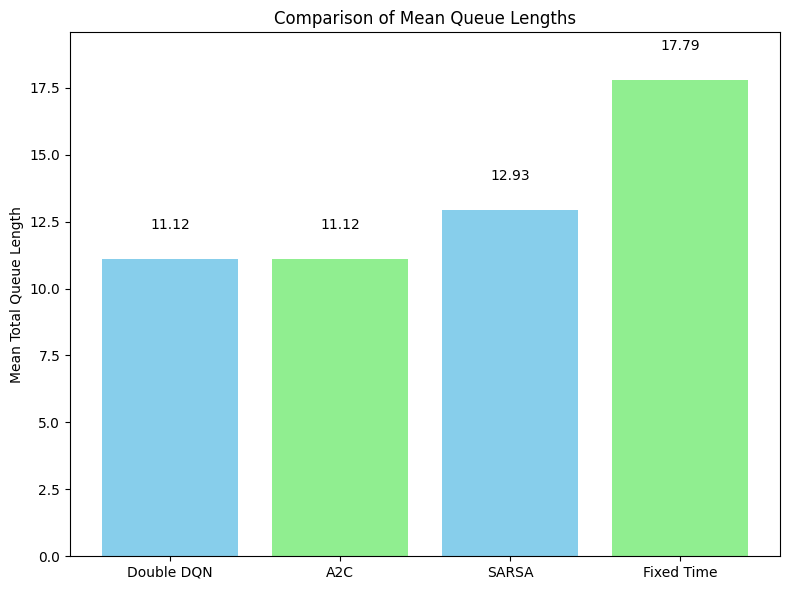

In [55]:
# Create bar plot
plt.figure(figsize=(8, 6))
methods = ['Double DQN', 'A2C', 'SARSA', 'Fixed Time']
means = [mean_dqn, mean_a2c, mean_sarsa, mean_ft]

bars = plt.bar(methods, means, color=['skyblue', 'lightgreen'])
plt.ylabel("Mean Total Queue Length")
plt.title("Comparison of Mean Queue Lengths")

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, max(means) * 1.1)
plt.tight_layout()
# Save the figure before showing it
plt.savefig("plots/comparism.png", dpi=300, bbox_inches="tight")
plt.show()